In [11]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sys import exit 

In [12]:
#
def brownian_displacement_display ( k, n, m, d, t, dsq ):

#*****************************************************************************80
#
## BROWNIAN_DISPLACEMENT_DISPLAY displays average Brownian motion displacement.
#
#  Parameters:
#
#    Input, integer K, the number of repetitions.
#
#    Input, integer N, the number of time steps.  
#
#    Input, integer M, the spatial dimension.
#
#    Input, real D, the diffusion coefficient.
#
#    Input, real T, the total time.
#
#    Input, real DSQ(K,N), the displacements over time for each repetition.
#
#  Get the T values.
#
  tvec = np.linspace ( 0, t, n )
#
#  Select 5 random trajectories for display.
#
  for s in range ( 0, 5 ):
    i = int ( k * np.random.rand ( 1 ) )
    plt.plot ( tvec, dsq[i,:], 'b-' )
#
#  Display the average displacement.
#
  dsq_ave = np.sum ( dsq, 0 ) / float ( k )
  plt.plot ( tvec, dsq_ave, 'r-', linewidth = 2 )
#
#  Display the ideal displacment.
#
  dsq_ideal = 2.0 * m * d * tvec
  plt.plot ( tvec, dsq_ideal, 'k-', linewidth = 3 )

  plt.grid ( True )
  plt.xlabel ( '<--T-->' )
  plt.ylabel ( '<--D^2-->' )
  plt.title ( 'Squared displacement (Red), Predicted (Black), Samples (Blue)' )

  filename = 'displacement_' + str ( m ) + '.png'
  plt.savefig ( filename )
  plt.show ( )
  plt.clf ( )

  print ( '' )
  print ( '  Plot saved as "%s".' % ( filename ) )

  return

In [13]:
def brownian_displacement_simulation ( k = 20, n = 1001, m = 2, d = 10.0, \
  t = 1.0 ):

#*****************************************************************************80
#
## BROWNIAN_DISPLACEMENT_SIMULATION simulates Brownian displacement.
#
#  Parameters:
#
#    Input, integer K, the number of repetitions.
#    The default is 20
#
#    Input, integer N, the number of time steps to take, plus 1.
#    This might be 1001.
#
#    Input, integer M, the spatial dimension.  Typically, this is 2.
#
#    Input, real D, the diffusion coefficient.  This might be 10.0.
#    Computationally, this is simply a scale factor between time and space.
#
#    Input, real T, the total time, which defaults to 1.0.
#
#    Output, real DSQ(K,N), the displacements over time for each repetition.
#    DSQ(:,1) is 0.0, because we include the displacement at the initial time. 
#

  dsq = np.zeros ( [ k, n ] )

  for i in range ( 0, k ):

    x = brownian_motion_simulation ( m, n, d, t )
    dsq[i,0:n] = np.sum ( x[0:m,0:n] ** 2, 0 )
    
  return dsq

In [14]:
def brownian_motion_display ( m, n, x ):

#*****************************************************************************80
#
## BROWNIAN_MOTION_DISPLAY displays successive Brownian motion positions.
#
#  Parameters:
#
#    Input, integer M, the spatial dimension.
#    M should be 1, 2 or 3.
#
#    Input, integer N, the number of time steps. 
#
#    Input, real X(M,N), the particle positions.
#
 

  if ( m == 1 ):  #1-D

    y = np.linspace ( 0, n - 1, n ) / float ( n - 1 )
    plt.plot ( x[0,:], y[:], 'b', linewidth = 2 )
    plt.plot ( x[0,0], y[0], 'g.', markersize = 35 )
    plt.plot ( x[0,n-1], y[n-1], 'r.', markersize = 35 )
    plt.grid ( True )
    plt.xlabel ( '<--X-->' )
    plt.ylabel ( '<--Time-->' )
    plt.title ( 'Brownian motion simulation in 1D' )
    filename = 'motion_' + str ( m ) + 'd.png'
    plt.savefig ( filename )
    plt.show ( )
    plt.clf ( )

  elif ( m == 2 ): #2-D

    plt.plot ( x[0,:], x[1,:], 'b', LineWidth = 2 )
    plt.plot ( x[0,0], x[1,0], 'g.', markersize = 35 )
    plt.plot ( x[0,n-1], x[1,n-1], 'r.', markersize = 35 )
    plt.grid ( True )
    plt.xlabel ( '<--X-->' )
    plt.ylabel ( '<--Y-->' )
    plt.title ( 'Brownian motion simulation in 2D' )
    plt.axis ( 'equal' )
    filename = 'motion_' + str ( m ) + 'd.png'
    plt.savefig ( filename )
    plt.show ( )
    plt.clf ( )
#
#  May I just say that I am struck by the inconsistency between 2D and 3D 
#  plotting?
#
  elif ( m == 3 ): #3-D

    fig = plt.figure ( )
    ax = fig.add_subplot ( 111, projection = '3d' )
    ax.plot ( x[0,:], x[1,:], x[2,:], 'b', linewidth = 2 )
    ax.scatter ( x[0,0], x[1,0], x[2,0], c = 'g', marker = 'o', s = 100 )
    ax.scatter ( x[0,n-1], x[1,n-1], x[2,n-1], c = 'r', marker = 'o', s = 100 ) 
    ax.grid ( True )
    ax.set_xlabel ( '<--X-->' )
    ax.set_ylabel ( '<--Y-->' )
    ax.set_zlabel ( '<--Z-->' )
    plt.title ( 'Brownian motion simulation in 3D' )
#   plt.axis ( 'equal' )
    filename = 'motion_' + str ( m ) + 'd.png'
    plt.savefig ( filename )
    plt.show ( block = False )
    plt.clf ( )

  else:

    print ( '' )
    print ( 'BROWNIAN_MOTION_DISPLAY - Fatal error!' )
    print ( '  Cannot display data except for M = 1, 2, 3.' )
    exit ( 'BROWNIAN_MOTION_DISPLAY - Fatal error!' )

  print ( '' )
  print ( '  Plot saved as "%s".' % ( filename ) )

  return

In [15]:
def brownian_motion_simulation ( m = 2, n = 1001, d = 10.0, t = 1.0 ):

#*****************************************************************************80
#
## BROWNIAN_MOTION_SIMULATION simulates Brownian motion.
#
#  Parameters:
#
#    Input, integer m, the spatial dimension.
#    This defaults to 2.
#
#    Input, integer n, the number of time steps to take, plus 1. 
#    This defaults to 1001.
#
#    Input, real d, the diffusion coefficient.  
#    This defaults to 10.0.
#
#    Input, real t, the total time.
#    This defaults to 1.0
#
#    Output, real X(M,N), the initial position at time 0.0, and 
#    the N-1 successive locations of the particle.
#
#
#  Set the time step.
#
  dt = t / float ( n - 1 )
#
#  Compute the individual steps.
#
  x = np.zeros ( [ m, n ] )

  for j in range ( 1, n ):
#
#  S is the stepsize
#
    s = np.sqrt ( 2.0 * m * d * dt ) * np.random.randn ( 1 )
#
#  Direction is random.
#
    if ( m == 1 ):
      dx = s * np.ones ( 1 );
    else:
      dx = np.random.randn ( m )
      norm_dx = np.sqrt ( np.sum ( dx ** 2 ) )
      for i in range ( 0, m ):
        dx[i] = s * dx[i] / norm_dx
#
#  Each position is the sum of the previous steps.
#
    x[0:m,j] = x[0:m,j-1] + dx[0:m]

  return x

Wed Apr 15 15:05:55 2020

BROWNIAN_MOTION_SIMULATION_TEST
  Python version
  Test the BROWNIAN_MOTION_SIMULATION library.


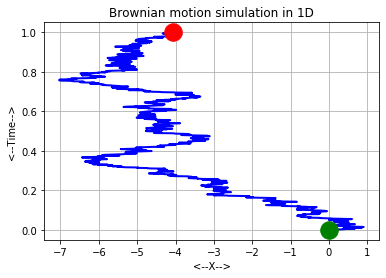


  Plot saved as "motion_1d.png".


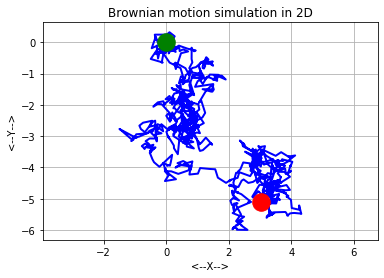


  Plot saved as "motion_2d.png".


<Figure size 432x288 with 0 Axes>

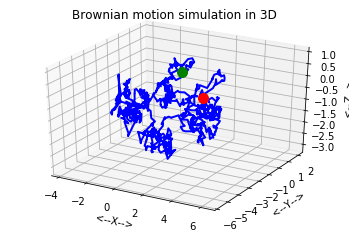


  Plot saved as "motion_3d.png".


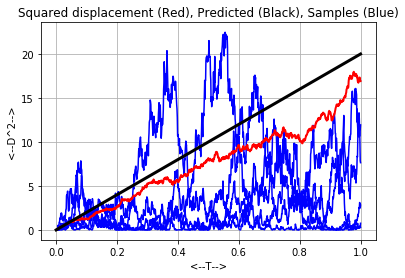


  Plot saved as "displacement_1.png".


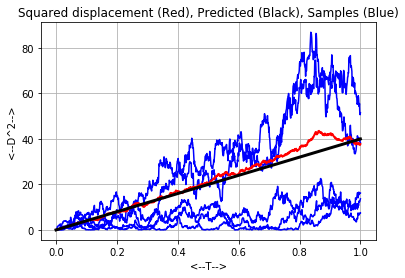


  Plot saved as "displacement_2.png".


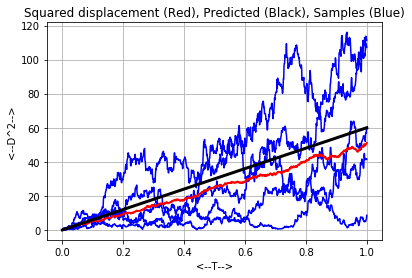


  Plot saved as "displacement_3.png".

BROWNIAN_MOTION_SIMULATION_TEST
  Normal end of execution.
Wed Apr 15 15:05:59 2020


<Figure size 432x288 with 0 Axes>

In [16]:
def brownian_motion_simulation_test ( ):

#*****************************************************************************80
#
## BROWNIAN_MOTION_SIMULATION_TEST tests the BROWNIAN_MOTION_SIMULATION library.
#
#
  print ( '' )
  print ( 'BROWNIAN_MOTION_SIMULATION_TEST' )
  print ( '  Python version' )
  print ( '  Test the BROWNIAN_MOTION_SIMULATION library.' )
#
#  Compute the path of a particle undergoing Brownian motion.
#
  for m in range ( 1, 4 ):
    n = 1001
    d = 10.0
    t = 1.0
    x = brownian_motion_simulation ( m, n, d, t )
    brownian_motion_display ( m, n, x )
#
#  Estimate the average displacement of the particle from the origin
#  as a function of time.
#
  for m in range ( 1, 4 ):  #from 1D to 3D
    k = 40
    n = 1001
    d = 10.0
    t = 1.0

    dsq = brownian_displacement_simulation ( k, n, m, d, t )
    brownian_displacement_display ( k, n, m, d, t, dsq )
#
#  Terminate.
#
  print ( '' )
  print ( 'BROWNIAN_MOTION_SIMULATION_TEST' )
  print ( '  Normal end of execution.' )
  return

def timestamp ( ):

#*****************************************************************************80
#
## TIMESTAMP prints the date as a timestamp.
#
#
  import time

  t = time.time ( )
  print ( time.ctime ( t ) )

  return None

if ( __name__ == '__main__' ):
  timestamp ( )
  brownian_motion_simulation_test ( )
  timestamp ( )